# Filtragem
https://github.com/andersondss/Lista-PDI

## Q1 - a

In [1]:
import math

import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('imagens/img_test.bmp', 0)

fourier = np.fft.fft2(img)
fourier_shifted = np.fft.fftshift(fourier)

magnitude_spectrum = 20*np.log(np.abs(fourier_shifted))

h, w = fourier_shifted.shape[0:2]
filt = np.zeros((h, w))

# wc = math.pi/8
# wc = math.pi/4
wc = 3*math.pi/8

wc_pixel = wc*(1/math.pi)*(np.floor(h/2))  # idealmente h = w

for i in range(h):
    for j in range(w):
        dist = ((i-(np.floor(h/2)))**2 + (j-(np.floor(w/2)))**2)**.5  # distancia do ponto a origem do filtro
        if dist <= wc_pixel:
            filt[i, j] = 1
        else:
            filt[i, j] = 0            

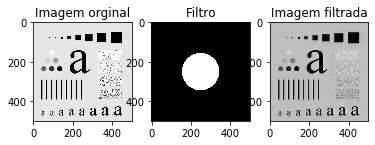

In [2]:
result = np.multiply(fourier_shifted, filt)

result_non_shifted = np.fft.ifftshift(result)
filtered_img = np.fft.ifft2(result_non_shifted)
filtered_img = np.abs(filtered_img)

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Imagem orginal')

plt.subplot(132), plt.imshow(filt, cmap='gray')
plt.title('Filtro')

plt.subplot(133), plt.imshow(filtered_img, cmap='gray')
plt.title('Imagem filtrada')

plt.show()

## Q1 - B

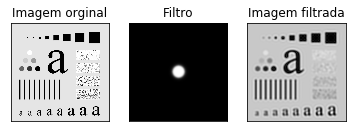

In [3]:
img = cv2.imread('imagens/img_test.bmp', 0)

fourier = np.fft.fft2(img)
fourier_shifted = np.fft.fftshift(fourier)

magnitude_spectrum = 20*np.log(np.abs(fourier_shifted))

h, w = fourier_shifted.shape[0:2]
filt = np.zeros((h, w))

wc = math.pi/8
# wc = math.pi/4
# wc = 3*math.pi/8

wc_pixel = wc*(1/math.pi)*(np.floor(h/2))  # idealmente h = w

n = 5

for i in range(h):
    for j in range(w):
        dist = ((i-(np.floor(h/2)))**2 + (j-(np.floor(w/2)))**2)**.5  # distancia do ponto a origem do filtro
        filt[i, j] = 1/(1+(dist/wc_pixel)**(2*n))  # Filtro Butterworth Passa-Baixa

result = np.multiply(fourier_shifted, filt)

result_non_shifted = np.fft.ifftshift(result)
filtered_img = np.fft.ifft2(result_non_shifted)
filtered_img = np.abs(filtered_img)

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Imagem orginal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(filt, cmap='gray')
plt.title('Filtro'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(filtered_img, cmap='gray')
plt.title('Imagem filtrada'), plt.xticks([]), plt.yticks([])

plt.show()

## Q1 - D

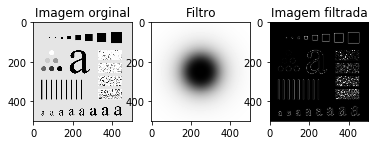

In [4]:
img = cv2.imread('imagens/img_test.bmp', 0)

fourier = np.fft.fft2(img)
fourier_shifted = np.fft.fftshift(fourier)

magnitude_spectrum = 20*np.log(np.abs(fourier_shifted))

h, w = fourier_shifted.shape[0:2]
filt = np.zeros((h, w))

# wc = math.pi/8
# wc = math.pi/4
wc = 3*math.pi/8

wc_pixel = wc*(1/math.pi)*(np.floor(h/2))  # idealmente h = w

n = 2

for i in range(h):
    for j in range(w):
        dist = ((i-(np.floor(h/2)))**2 + (j-(np.floor(w/2)))**2)**.5  # distancia ao centro da imagem
        filt[i, j] = 1-(1/(1+(dist/wc_pixel)**(2*n)))  # Filtro Butterworth Passa-Alta

result = np.multiply(fourier_shifted, filt)

result_non_shifted = np.fft.ifftshift(result)
filtered_img = np.fft.ifft2(result_non_shifted)
filtered_img = np.abs(filtered_img)

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Imagem orginal')

plt.subplot(132), plt.imshow(filt, cmap='gray')
plt.title('Filtro')

plt.subplot(133), plt.imshow(filtered_img, cmap='gray')
plt.title('Imagem filtrada')

plt.show()

## Q2

In [ ]:
gray = cv2.imread('imagens/knee-mri-white.jpg', 0)
img_pot = cv2.imread('imagens/knee-mri-white.jpg', 0)

y = 5  # Valor da potecia  BEST VALUES: 1 | 5 | 10 | 15 | 20 | 25 | 30 |
c = 1

for i in range(img_pot.shape[0]):
    for j in range(img_pot.shape[1]):
        img_pot[i, j] = (c*math.pow(img_pot[i, j]/255.0, y))*255.0

cv2.imshow('teste1', gray)
cv2.imshow('teste2', img_pot)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Q3 - a

In [1]:
import random

import numpy as np
import cv2
from matplotlib import pyplot as plt

img = plt.imread('imagens/carta_getulio.jpg')
gray = cv2.imread('imagens/carta_getulio.jpg', 0)
'''
    Metodo Global Simples
'''
# Estimativa Inicial para o limiar Global t
t = random.randint(0, 255)
dt = 1
t_new = t + dt + 1

# Calculando Histograma
# histograma = plt.hist(gray)
# plt.show()

plt.subplot(121), plt.imshow(gray, cmap='gray')
plt.title('Imagem em Niveis de Cinza')
plt.subplot(122), plt.hist(gray)
plt.title('Histograma')
plt.show()

while abs(t - t_new) >= dt:
    t = t_new
    res = gray >= t
    # Calculo das intensidades medias
    if np.isnan(np.mean(gray[res==False])):
        m1 = 0 + 2
    else:
        m1 = int(round(np.mean(gray[res==False])))  # Media de 0's
    if np.isnan(np.mean(gray[res])):
        m2 = 0 + 2
    else:
        m2 = int(round(np.mean(gray[res])))  # Media de 0's
    # Calculo do novo limiar
    t_new = int(round(0.5 * (m1+m2)))

res = gray >= t_new

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Imagem orginal')
plt.subplot(132), plt.imshow(gray, cmap='gray')
plt.title('Imagem Gray')
plt.subplot(133), plt.imshow(res, cmap='gray')
plt.title('Imagem Limiarizada')
plt.show()

plt.imshow(res, cmap='gray')
plt.title('Imagem Limiarizada')
plt.show()

<Figure size 640x480 with 2 Axes>

<Figure size 640x480 with 3 Axes>

<Figure size 640x480 with 1 Axes>

## Q3 - b

C:\Users\Camila\Anaconda3\envs\pdi\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Camila\Anaconda3\envs\pdi\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


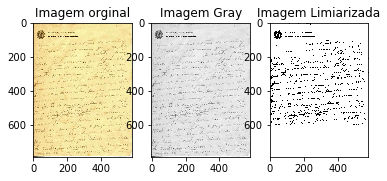

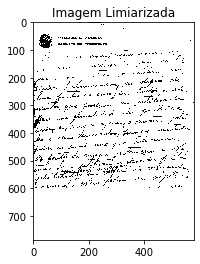

In [2]:
import random

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = plt.imread('imagens/carta_getulio.jpg')
gray = cv2.imread('imagens/carta_getulio.jpg', 0)
im_lim = cv2.imread('imagens/carta_getulio.jpg', 0)
'''
    Limiarizacao Local
'''
w = 200
# Iniciando os Limiares
T = [[random.randint(0, 255) for x in range(int(gray.shape[1]/w))] for x in range(int((gray.shape[0]/w)))]

dt = 1
t_new = np.array(T)+dt+1
# Define the window size
windowsize_r = w
windowsize_c = w

i = 0
for r in range(0, gray.shape[0]-windowsize_r, windowsize_r):  # linhas
    j = 0
    for c in range(0, gray.shape[1]-windowsize_c, windowsize_c):  # Colunas
        window = gray[r:r+windowsize_r, c:c+windowsize_c]
        # plt.imshow(window, cmap = 'gray')
        # plt.show()
        # hist = np.histogram(window,bins=256)
        while abs(T[i][j] - t_new[i, j]) >= dt:
            T[i][j] = t_new[i, j]
            res = window >= T[i][j]
            # plt.hist(window)
            # plt.show()
            # Calculo das intensidades medias
            if np.isnan(np.mean(window[res==False])):
                m_1 = 0 + 2
            else:
                m_1 = int(round(np.mean(window[res==False])))  # Media de 0's
            if np.isnan(np.mean(window[res])):
                m_2 = 0 + 2
            else:
                m_2 = int(round(np.mean(window[res])))  # Media de 0's
            # Calculo do novo limiar
            t_new[i, j] = int(round(0.5 * (m_1+m_2)))

        im_lim[r:r+windowsize_r, c:c+windowsize_c] = im_lim[r:r+windowsize_r, c:c+windowsize_c] >= t_new[i, j]
        j = j+1
    # Ajustando na horizontal
    if np.mod(gray.shape[1], w) != 0:
        # Redimensionando a janela
        windowsize_r_aux = w
        windowsize_c_aux = int(np.mod(gray.shape[1], w))
        # Obtendo a janela
        window = gray[r:r+windowsize_r_aux, c:c+windowsize_c_aux]
        t_aux = random.randint(0, 255)
        t_new_aux = t_aux+dt+1
        while abs(t_aux - t_new_aux) >= dt:
            t_aux = t_new_aux
            res = window >= t_aux
            # Calculo das intensidades medias
            if np.isnan(np.mean(window[res==False])):
                m_1 = 0 + 2
            else:
                m_1 = int(round(np.mean(window[res==False])))  # Media de 0's
            if np.isnan(np.mean(window[res])):
                m_2 = 0 + 2
            else:
                m_2 = int(round(np.mean(window[res])))  # Media de 0's
            # Calculo do novo limiar
            t_new_aux = int(round(0.5 * (m_1+m_2)))
        im_lim[r:r+windowsize_r_aux, c+windowsize_c:c+windowsize_c+windowsize_c_aux] = im_lim[r:r+windowsize_r_aux, c+windowsize_c:c+windowsize_c+windowsize_c_aux] >= t_new_aux
    i = i+1

# Ajustando na Vertical
if np.mod(gray.shape[0], w) != 0:
    # Redimensionando a janela
    windowsize_r_aux = int(np.mod(gray.shape[0], w))
    windowsize_c_aux = w
    # Percorrendo a ultima linha da imagem
    for c in range(0, gray.shape[1]-windowsize_c_aux, windowsize_c_aux):  # Colunas
        window = gray[r+windowsize_r:r+windowsize_r_aux, c:c+windowsize_c_aux]
        t_aux = random.randint(0, 255)
        t_new_aux = t_aux+dt+1
        while abs(t_aux - t_new_aux) >= dt:
            t_aux = t_new_aux
            res = window >= t_aux
            # Calculo das intensidades medias
            if np.isnan(np.mean(window[res==False])):
                m_1 = 0 + 2
            else:
                m_1 = int(round(np.mean(window[res==False])))  # Media de 0's
            if np.isnan(np.mean(window[res])):
                m_2 = 0 + 2
            else:
                m_2 = int(round(np.mean(window[res])))  # Media de 0's
            # Calculo do novo limiar
            t_new_aux = int(round(0.5 * (m_1+m_2)))
        im_lim[r+windowsize_r:(r+windowsize_r+windowsize_r_aux), c:c+windowsize_c] = im_lim[r+windowsize_r:(r+windowsize_r+windowsize_r_aux), c:c+windowsize_c]>=t_new_aux

# Ajustando na horizontal - Ultimo frame :p
if np.mod(gray.shape[1], w) != 0:
    # Redimensionando a janela
    windowsize_r_aux = int(np.mod(gray.shape[0], w))
    windowsize_c_aux = int(np.mod(gray.shape[1], w))
    # Obtendo a janela
    window = gray[r+windowsize_r:r+windowsize_r_aux, c+windowsize_c:c+windowsize_c_aux]
    t_aux = random.randint(0, 255)
    t_new_aux = t_aux+dt+1
    while abs(t_aux - t_new_aux) >= dt:
        t_aux = t_new_aux
        res = window >= t_aux
        # Calculo das intensidades medias
        if np.isnan(np.mean(window[res==False])):
            m_1 = 0 + 2
        else:
            m_1 = int(round(np.mean(window[res==False])))  # Media de 0's
        if np.isnan(np.mean(window[res])):
            m_2 = 0 + 2
        else:
            m_2 = int(round(np.mean(window[res])))  # Media de 0's
        # Calculo do novo limiar
        t_new_aux = int(round(0.5 * (m_1+m_2)))
    im_lim[r+windowsize_r:(r+windowsize_r+windowsize_r_aux), c+windowsize_c:(c+windowsize_c+windowsize_c_aux)] = im_lim[r+windowsize_r:(r+windowsize_r+windowsize_r_aux), c+windowsize_c:(c+windowsize_c+windowsize_c_aux)]>=t_new_aux

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Imagem orginal')
plt.subplot(132), plt.imshow(gray, cmap='gray')
plt.title('Imagem Gray')
plt.subplot(133), plt.imshow(im_lim, cmap='gray')
plt.title('Imagem Limiarizada')

plt.show()

plt.imshow(im_lim, cmap='gray')
plt.title('Imagem Limiarizada')

plt.show()

## Q4 - a

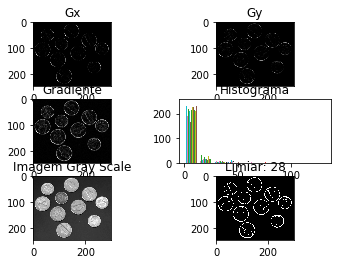

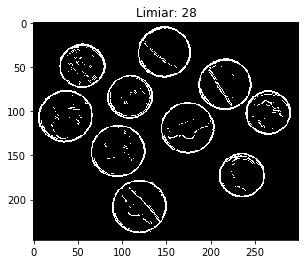

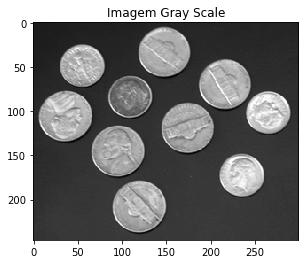

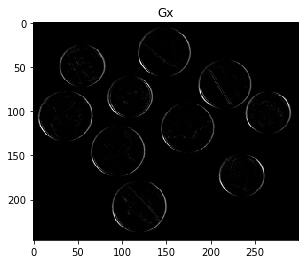

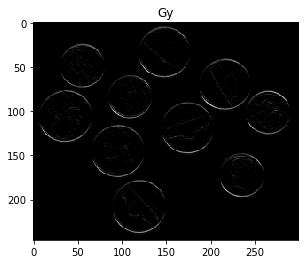

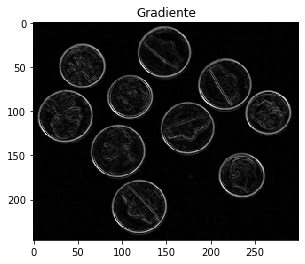

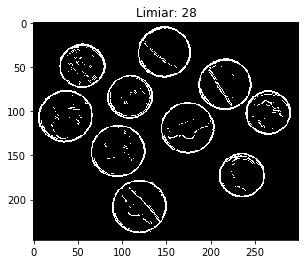

In [4]:
import random

import cv2
import numpy as np
from numpy import str_
from matplotlib import pyplot as plt

gray = cv2.imread('imagens/coins.bmp', 0)

d_y, d_x = np.gradient(np.double(gray))

m_gx = np.power(d_x, 2.0)
m_gy = np.power(d_y, 2.0)

m = np.sqrt((m_gx + m_gy))  # Magnitude do gradiente
'''
    Metodo Global Simples
'''
# Estimativa Inicial para o limiar Global t
t = random.randint(0, 255)
# parametro dt
dt = 1
t_new = t + dt + 1
while abs(t - t_new) >= dt:
    t = t_new
    res = m >= t
    # Calculo das intensidades medias
    if np.isnan(np.mean(m[res==False])):
        m1 = 0 + 2
    else:
        m1 = int(round(np.mean(m[res==False])))  # Media de 0's
    if np.isnan(np.mean(m[res])):
        m2 = 0 + 2
    else:
        m2 = int(round(np.mean(m[res])))  # Media de 0's
    # Calculo do novo limiar
    t_new = int(round(0.5 * (m1+m2)))

output = m >= t_new

plt.subplot(321), plt.imshow(m_gx, cmap='gray')
plt.title('Gx')

plt.subplot(322), plt.imshow(m_gy, cmap='gray')
plt.title('Gy')

plt.subplot(323), plt.imshow(m, cmap='gray')
plt.title('Gradiente')

plt.subplot(324), plt.hist(m)
plt.title('Histograma')

plt.subplot(325), plt.imshow(gray, cmap='gray')
plt.title('Imagem Gray Scale')

plt.subplot(326), plt.imshow(output, cmap='gray')
plt.title('Limiar: ' + str_(t_new))

plt.show()

plt.imshow(output, cmap='gray')
plt.title('Limiar: ' + str_(t_new)), 

plt.show()

# PLOTANDO IMAGENS INDIVIDUAIS

plt.imshow(gray, cmap='gray')
plt.title('Imagem Gray Scale')
plt.show()

plt.imshow(m_gx, cmap='gray')
plt.title('Gx')
plt.show()

plt.imshow(m_gy, cmap='gray')
plt.title('Gy')
plt.show()

plt.imshow(m, cmap='gray')
plt.title('Gradiente')
plt.show()

plt.imshow(output, cmap='gray')
plt.title('Limiar: ' + str_(t_new))
plt.show()

## Q4 - b

C:\Users\Camila\Anaconda3\envs\pdi\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Camila\Anaconda3\envs\pdi\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


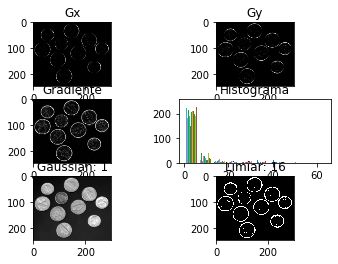

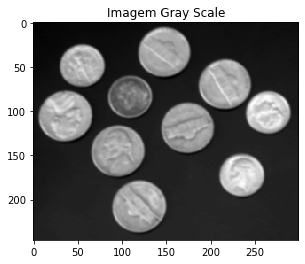

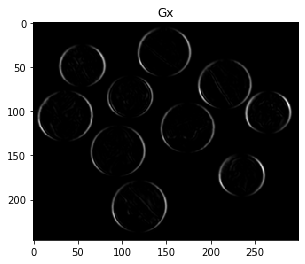

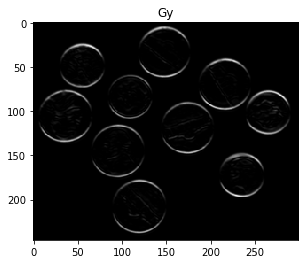

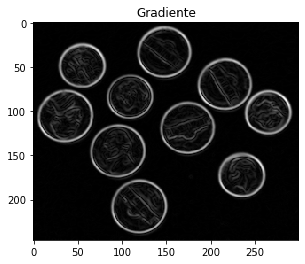

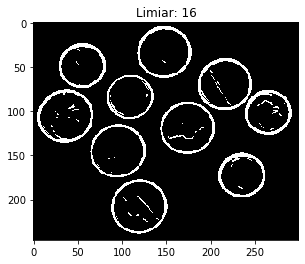

In [5]:
import random

import cv2
import numpy as np
from numpy import str_
from matplotlib import pyplot as plt
import scipy.ndimage.filters as filters

gray = cv2.imread('imagens/coins.bmp', 0)

o = 1
gray = filters.gaussian_filter(gray, o)
d_y, d_x = np.gradient(np.double(gray))

m_gx = np.power(d_x, 2.0)
m_gy = np.power(d_y, 2.0)

m = np.sqrt((m_gx + m_gy))  # Magnitude do gradiente
'''
    Metodo Global Simples
'''
# Estimativa Inicial para o limiar Global t
t = random.randint(0, 255)
dt = 1
t_new = t + dt + 1
while abs(t - t_new) >= dt:
    t = t_new
    res = m >= t
    # Calculo das intensidades medias
    if np.isnan(np.mean(m[res==False])):
        m1 = 0 + 2
    else:
        m1 = int(round(np.mean(m[res==False])))  # Media de 0's
    if np.isnan(np.mean(m[res])):
        m2 = 0 + 2
    else:
        m2 = int(round(np.mean(m[res])))  # Media de 0's

    # Calculo do novo limiar
    t_new = int(round(0.5 * (m1+m2)))

output = m >= t_new

plt.subplot(321), plt.imshow(m_gx, cmap='gray')
plt.title('Gx')

plt.subplot(322), plt.imshow(m_gy, cmap='gray')
plt.title('Gy')

plt.subplot(323), plt.imshow(m, cmap='gray')
plt.title('Gradiente')

plt.subplot(324), plt.hist(m)
plt.title('Histograma')

plt.subplot(325), plt.imshow(gray, cmap='gray')
plt.title('Gaussian: ' + str_(o))

plt.subplot(326), plt.imshow(output, cmap='gray')
plt.title('Limiar: ' + str_(t_new))

plt.show()

# PLOTANDO IMAGENS INDIVIDUAIS
plt.imshow(gray, cmap='gray')
plt.title('Imagem Gray Scale')
plt.show()

plt.imshow(m_gx, cmap='gray')
plt.title('Gx')
plt.show()

plt.imshow(m_gy, cmap='gray')
plt.title('Gy')
plt.show()

plt.imshow(m, cmap='gray')
plt.title('Gradiente')
plt.show()

plt.imshow(output, cmap='gray')
plt.title('Limiar: ' + str_(t_new))
plt.show()

## Q5

C:\Users\Camila\Anaconda3\envs\pdi\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Camila\Anaconda3\envs\pdi\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Camila\Anaconda3\envs\pdi\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in tan
C:\Users\Camila\Anaconda3\envs\pdi\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Camila\Anaconda3\envs\pdi\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


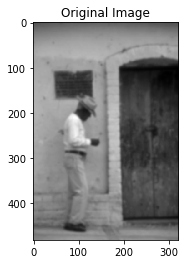

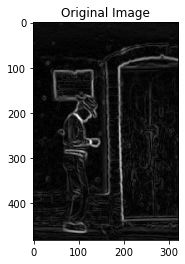

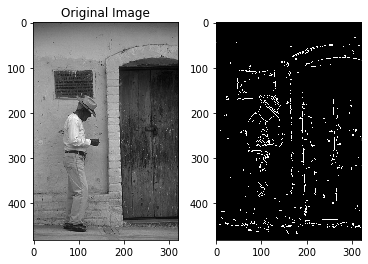

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import scipy.ndimage.filters as filters

img = cv2.imread('imagens/old_man.jpg', 0)
# img = cv2.imread('imagens/plane.jpg', 0)
# img = cv2.imread('imagens/monkey.jpg', 0)

o = 2
gray = filters.gaussian_filter(img, o)

dy, dx = np.gradient(np.double(gray))

gx = np.power(dx, 2.0)
gy = np.power(dy, 2.0)
m = np.sqrt((gx + gy))  # Magnitude do gradiente

direcao = np.divide(1, np.tan(np.divide(gy, gx)))
direcao = np.arctan(np.divide(gy, gx))

plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.show()

plt.imshow(m, cmap='gray')
plt.title('Original Image')
plt.show()

t_baixo = 150
t_alto = 200

edges = cv2.Canny(img, t_baixo, t_alto)

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Bordas')

plt.imshow(edges, cmap='gray')
plt.title('')
plt.show()

## Q6 - a

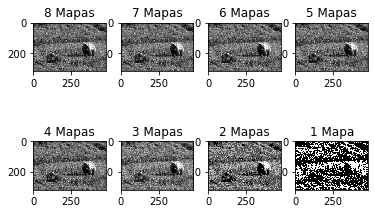

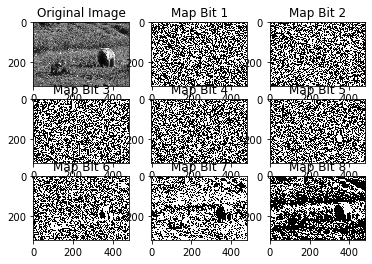

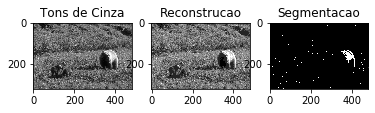

In [7]:
import math

import cv2
import numpy as np
from numpy import str_
from matplotlib import pyplot as plt
from scipy.stats.stats import kurtosis, skew
'''
    Parametros (Limiar)
    pyramid: 500 | 100
    flowers: 400 | 200
    animals: 450 | 200
    bear:    500 | 200
'''
name = 'animals'  # pyramid | flowers | animals | bear
img = cv2.imread('imagens/' + name + '.jpg', 0)
limiar = 200

bit_1 = np.mod(img, 2)  # LSB
bit_2 = np.mod(np.floor(np.divide(img, 2.)), 2)
bit_3 = np.mod(np.floor(np.divide(img, 4.)), 2)
bit_4 = np.mod(np.floor(np.divide(img, 8.)), 2)
bit_5 = np.mod(np.floor(np.divide(img, 16.)), 2)
bit_6 = np.mod(np.floor(np.divide(img, 32.)), 2)
bit_7 = np.mod(np.floor(np.divide(img, 64.)), 2)
bit_8 = np.mod(np.floor(np.divide(img, 128.)), 2)  # MSB

im_reconstrucao_8 = 2*(2*(2*(2*(2*(2*(2*bit_8+bit_7)+bit_6)+bit_5)+bit_4)+bit_3)+bit_2)+bit_1
im_reconstrucao_7 = 2*(2*(2*(2*(2*(2*bit_8+bit_7)+bit_6)+bit_5)+bit_4)+bit_3)+bit_2
im_reconstrucao_6 = 2*(2*(2*(2*(2*bit_8+bit_7)+bit_6)+bit_5)+bit_4)+bit_3
im_reconstrucao_5 = 2*(2*(2*(2*bit_8+bit_7)+bit_6)+bit_5)+bit_4
im_reconstrucao_4 = 2*(2*(2*bit_8+bit_7)+bit_6)+bit_5
im_reconstrucao_3 = 2*(2*bit_8+bit_7)+bit_6
im_reconstrucao_2 = 2*bit_8+bit_7
im_reconstrucao_1 = bit_8

plt.subplot(248), plt.imshow(im_reconstrucao_1, cmap='gray')
plt.title('1 Mapa')

plt.subplot(247), plt.imshow(im_reconstrucao_2, cmap='gray')
plt.title('2 Mapas')

plt.subplot(246), plt.imshow(im_reconstrucao_3, cmap='gray')
plt.title('3 Mapas')

plt.subplot(245), plt.imshow(im_reconstrucao_4, cmap='gray')
plt.title('4 Mapas')

plt.subplot(244), plt.imshow(im_reconstrucao_5, cmap='gray')
plt.title('5 Mapas')

plt.subplot(243), plt.imshow(im_reconstrucao_6, cmap='gray')
plt.title('6 Mapas')

plt.subplot(242), plt.imshow(im_reconstrucao_7, cmap='gray')
plt.title('7 Mapas')

plt.subplot(241), plt.imshow(im_reconstrucao_8, cmap='gray')
plt.title('8 Mapas')

plt.show()

plt.subplot(331), plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(332), plt.imshow(bit_1, cmap='gray')
plt.title('Map Bit 1')

plt.subplot(333), plt.imshow(bit_2, cmap='gray')
plt.title('Map Bit 2')

plt.subplot(334), plt.imshow(bit_3, cmap='gray')
plt.title('Map Bit 3')

plt.subplot(335), plt.imshow(bit_4, cmap='gray')
plt.title('Map Bit 4')

plt.subplot(336), plt.imshow(bit_5, cmap='gray')
plt.title('Map Bit 5')

plt.subplot(337), plt.imshow(bit_6, cmap='gray')
plt.title('Map Bit 6')

plt.subplot(338), plt.imshow(bit_7, cmap='gray')
plt.title('Map Bit 7')

plt.subplot(339), plt.imshow(bit_8, cmap='gray')
plt.title('Map Bit 8')

plt.show()

medias = []
variancias = []
curtoses = []
assimetrias = []

for i in range(int(im_reconstrucao_3.max()+1)):
    indices = np.equal(im_reconstrucao_3, i)
    plt.imshow(indices, cmap='gray')
    im_aux = np.multiply(img, indices)
    if(im_aux.max()):
        # plt.imshow(im_aux, cmap='gray')
        # plt.title('Intensidade: ' + str_(i)), plt.xticks([]), plt.yticks([])
        # plt.show()
        medias.append(np.mean(im_aux))
        variancias.append(np.var(im_aux))
        curtoses.append(np.mean(kurtosis(im_aux)))
        assimetrias.append(np.mean(skew(im_aux)))
    else:
        medias.append(0)
        variancias.append(0)
        curtoses.append(0)
        assimetrias.append(0)
        print('A imagem não possui nenhuma intensidade ' + str_(i))

niveis = []
# plt.imshow(im_reconstrucao_3, cmap='gray')
# plt.show()
for i in range(len(medias)):
    for j in range(len(medias)):
        if(i != j):
            distancia = math.sqrt(np.power((medias[i]-medias[j]), 2)+np.power((variancias[i]-variancias[j]), 2) +
                                  np.power((curtoses[i]-curtoses[j]), 2)+np.power((assimetrias[i]-assimetrias[j]), 2))
            if distancia < limiar:
                if not(i in niveis):
                    niveis.append(i)

# Segmentacao Final :D
output = np.multiply(im_reconstrucao_3, 0)
output_2 = np.multiply(im_reconstrucao_3, 0)
for i in range(1, len(niveis)):
    indices = np.equal(im_reconstrucao_3, niveis[i])
    output[indices] = np.add(output[indices], im_reconstrucao_3[indices])
    output_2[indices] = np.add(output_2[indices], np.divide(im_reconstrucao_3[indices], niveis[i]))

output = np.multiply(im_reconstrucao_3, output_2)

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Tons de Cinza')
plt.subplot(132), plt.imshow(im_reconstrucao_3, cmap='gray')
plt.title('Reconstrucao')
plt.subplot(133), plt.imshow(output_2, cmap='gray')
plt.title('Segmentacao')
plt.show()

## Q6 - b

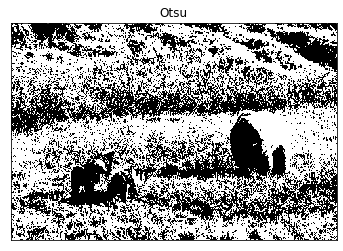

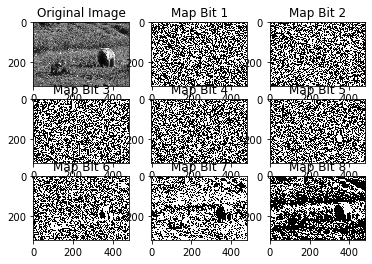

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

name = 'animals'  # pyramid | flowers | bear | animals
img = cv2.imread('imagens/' + name + '.jpg', 0)

# Gaussian filtering
blur = cv2.GaussianBlur(img, (5, 5), 0)  # Otsu's thresholding after Gaussian filtering
ret_3, th_3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret_2, th_2 = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
plt.imshow(th_2, cmap='gray')
plt.title('Otsu'), plt.xticks([]), plt.yticks([])
plt.show()

bit_1 = np.mod(img, 2)  # LSB
bit_2 = np.mod(np.floor(np.divide(img, 2.)), 2)
bit_3 = np.mod(np.floor(np.divide(img, 4.)), 2)
bit_4 = np.mod(np.floor(np.divide(img, 8.)), 2)
bit_5 = np.mod(np.floor(np.divide(img, 16.)), 2)
bit_6 = np.mod(np.floor(np.divide(img, 32.)), 2)
bit_7 = np.mod(np.floor(np.divide(img, 64.)), 2)
bit_8 = np.mod(np.floor(np.divide(img, 128.)), 2)  # MSB

plt.subplot(331), plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(332), plt.imshow(bit_1, cmap='gray')
plt.title('Map Bit 1')

plt.subplot(333), plt.imshow(bit_2, cmap='gray')
plt.title('Map Bit 2')

plt.subplot(334), plt.imshow(bit_3, cmap='gray')
plt.title('Map Bit 3')

plt.subplot(335), plt.imshow(bit_4, cmap='gray')
plt.title('Map Bit 4')

plt.subplot(336), plt.imshow(bit_5, cmap='gray')
plt.title('Map Bit 5')

plt.subplot(337), plt.imshow(bit_6, cmap='gray')
plt.title('Map Bit 6')

plt.subplot(338), plt.imshow(bit_7, cmap='gray')
plt.title('Map Bit 7')

plt.subplot(339), plt.imshow(bit_8, cmap='gray')
plt.title('Map Bit 8')

plt.show()

## Q7

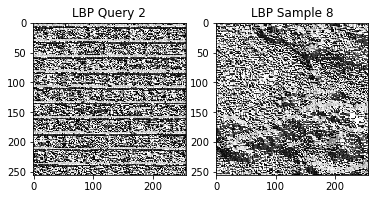

3.973615195104506e-05


In [9]:
import cv2
import numpy as np
from numpy import str_
from matplotlib import pyplot as plt


def limiar(centro, pixels):
    output = []
    for a in pixels:
        if a >= centro:
            output.append(1)
        else:
            output.append(0)
    return output


def get_pixel(image, x, y):
    try:
        return image[x, y]
    except IndexError:
        return 0


def get_lbp(img, img_lbp):
    for x in range(0, img.shape[0]):
        for y in range(0, img.shape[1]):
            centro = img[x, y]
            acima_esquerda = get_pixel(img, x-1, y-1)
            acima = get_pixel(img, x, y-1)
            acima_direita = get_pixel(img, x+1, y-1)
            direta = get_pixel(img, x+1, y)
            esquerda = get_pixel(img, x-1, y)
            abaixo_esquerda = get_pixel(img, x-1, y+1)
            abaixo_direita = get_pixel(img, x+1, y+1)
            abaixo = get_pixel(img, x, y+1)
            values = limiar(centro, [acima_esquerda, acima, acima_direita, direta, abaixo_direita, abaixo,
                                     abaixo_esquerda, esquerda])
            weights = [1, 2, 4, 8, 16, 32, 64, 128]
            res = 0
            for a in range(0, values.__len__()):
                res += weights[a] * values[a]
            img_lbp[x, y] = res
    return img_lbp

# Selecionando as imagens

n_query = 2  # 1 - 2
n_image = 8  # 1 - 8

img_aux_1 = cv2.imread('imagens/query_' + str_(n_query) + '.jpg', 0)
img_aux_2 = cv2.imread('imagens/query_' + str_(n_query) + '.jpg', 0)
img_aux_2 = cv2.imread('imagens/texture_sample_' + str_(n_image) + '.jpg', 0)
img_lbp = cv2.imread('imagens/query_' + str_(n_query) + '.jpg', 0)
amostra_lbp = cv2.imread('imagens/texture_sample_' + str_(n_image) + '.jpg', 0)
img_lbp = get_lbp(img_aux_1, img_lbp)
amostra_lbp = get_lbp(img_aux_2, amostra_lbp)

plt.subplot(121), plt.imshow(img_lbp, cmap='gray')
plt.title('LBP Query ' + str_(n_query))

plt.subplot(122), plt.imshow(amostra_lbp, cmap='gray')
plt.title('LBP Sample ' + str_(n_image))

plt.show()

hist_image, bins = np.histogram(img_lbp.flatten(), 256, [0, 256])
hist_amostra, bins = np.histogram(amostra_lbp.flatten(), 256, [0, 256])

dist = 0
for i in range(hist_image.shape[0]):
    dist = dist + np.sqrt(np.power(hist_image[i]-hist_amostra[i], 2))

if dist != 0:
    print(1.0/float(dist))
else:
    print(1)